In [1]:
import pandas as pd
import numpy as np
import os,glob
from matplotlib import pyplot as plt

In [57]:
new = pd.read_json('other_files/merged_summary_topics.json')
# my data is in data2 not data
new['File'] = [x[5:] for x in new.File]
new['File_num'] = [int(x[:-4]) for x in new.File]
new['tag_count'] = [len(x) for x in new.topic_lists]
# setting the index to file_num makes it hard to select 
# new.set_index('File_num',inplace=True)

# create an identifier for every six months of conference so I can group by it

In [1]:
# [str(x) for x in new['Year']]

In [66]:
# new['month_year'] =  new['Month_letter'] + "_" + [str(x) for x in new['Year']] 
new['month_year'] = [str(new['Year'][i]) + "_" + new['Month_letter'][i] for i in range(len(new['Year']))]  
new.iloc[:3,-1]

0    1971_A
1    1971_A
2    1971_A
Name: month_year, dtype: object

In [67]:
new.columns[-4:]

Index(['youth', 'File_num', 'tag_count', 'month_year'], dtype='object')

In [68]:
l = list(new.columns[9:-3].values)
print(len(l))
l.append('month_year')
print(len(l))

298
299


In [69]:
topics = new[l]
agg = topics.groupby('month_year').sum()

In [70]:
agg.index

Index(['1971_A', '1971_O', '1972_A', '1972_O', '1973_A', '1973_O', '1974_A',
       '1974_O', '1975_A', '1975_O', '1976_A', '1976_O', '1977_A', '1977_O',
       '1978_A', '1978_O', '1979_A', '1979_O', '1980_A', '1980_O', '1981_A',
       '1981_O', '1982_A', '1982_O', '1983_A', '1983_O', '1984_A', '1984_O',
       '1985_A', '1985_O', '1986_A', '1986_O', '1987_A', '1987_O', '1988_A',
       '1988_O', '1989_A', '1989_O', '1990_A', '1990_O', '1991_A', '1991_O',
       '1992_A', '1992_O', '1993_A', '1993_O', '1994_A', '1994_O', '1995_A',
       '1995_O', '1996_A', '1996_O', '1997_A', '1997_O', '1998_A', '1998_O',
       '1999_A', '1999_O', '2000_A', '2000_O', '2001_A', '2001_O', '2002_A',
       '2002_O', '2003_A', '2003_O', '2004_A', '2004_O', '2005_A', '2005_O',
       '2006_A', '2006_O', '2007_A', '2007_O', '2008_A', '2008_O', '2009_A',
       '2009_O', '2010_A', '2010_O', '2011_A', '2011_O', '2012_A', '2012_O',
       '2013_A', '2013_O', '2014_A', '2014_O', '2015_A', '2015_O', '2016_A',

In [218]:
save_title = 'bla'
if save_title:
    print('Not None')
else:
    print('None')

Not None


In [219]:
def plot_past_topics(topics,last_num_years=10,skip=2,save_title=None):
    if isinstance(topics,list):
        pass
    else:
        # in the case its an individual topic
        topics = list(topics)
        
    rows = -2*last_num_years
    
    fig = plt.figure(figsize=(10,5))
    for topic in topics:
        plt.plot(agg[topic].iloc[rows:],label=topic)
        plt.xticks(agg[topic].iloc[rows:].index[::skip])
    # plt.xticks(range(2009,2019))
    plt.legend()
    plt.title('Topic Popularity over Time')
    if save_title:
        plt.savefig(save_title,dpi=300)
    plt.show()
    
    

In [ ]:
# def make_specific_plot()
# 

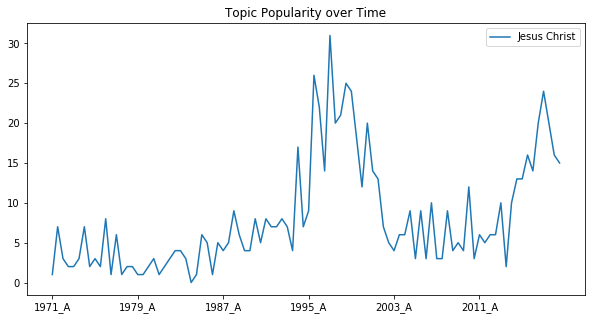

In [239]:
TITLE = 'topic_popularity_00.png'
plot_past_topics(topics=['Jesus Christ'],last_num_years=50,skip=16,save_title=TITLE)
# plot_past_topics(topics='Jesus Christ',last_num_years=20,skip=4)

In [215]:
plt.savefig('bla2.png')


<Figure size 432x288 with 0 Axes>

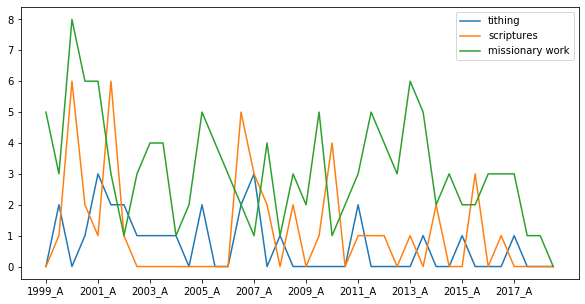

In [104]:
topics = ['tithing'
         ,'scriptures'
         ,'missionary work']
plot_past_topics(topics=topics,last_num_years=20,skip=4)

# WORD CLOUD ART

In [170]:
a = []
for l in new.topic_lists:
    for topic in l:
        a.append(topic)
        
for word in a[:50]:
    print(a + ' ')

In [176]:
# with open('topic_word_count.txt','w') as f:
#     for word in a:
#         f.write(word + ' ')

In [177]:
# with open('topic_word_count.txt','r') as f:
#     data = f.readlines()

In [179]:
# data

# Back to plotting topics over time

In [159]:
topic_counts = new.iloc[:,9:-3].sum()
topic_counts.sort_values(ascending=False,inplace=True)
topic_counts

Jesus Christ        774
faith               464
service             410
family              385
obedience           379
                   ... 
First Vision          0
depression            0
prejudice             0
humanitarian aid      0
spiritual gifts       0
Length: 298, dtype: int64

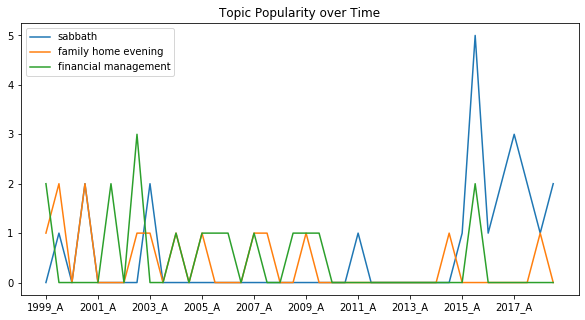

In [224]:
# between 30 and 50
topics = ['sabbath'
         ,'family home evening'
         ,'financial management']
plot_past_topics(topics=topics,last_num_years=20,skip=4)

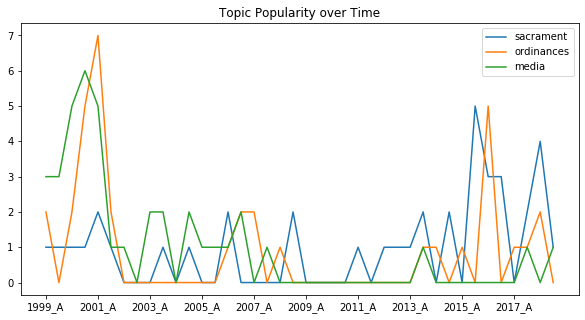

In [225]:
# between 50 and 70
topics = ['sacrament'
         ,'ordinances'
         #,'tithing'
         ,'media']
plot_past_topics(topics=topics,last_num_years=20,skip=4)

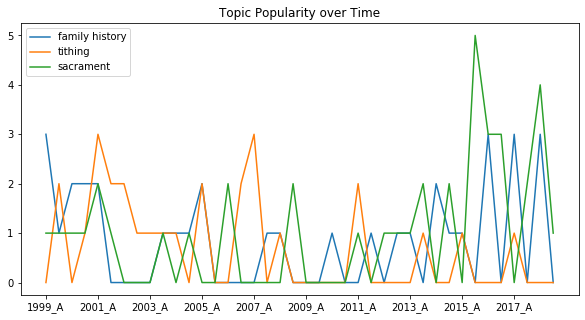

In [226]:
# between 50 and 70
topics = ['family history'
         ,'tithing'
         ,'sacrament']
plot_past_topics(topics=topics,last_num_years=20,skip=4)

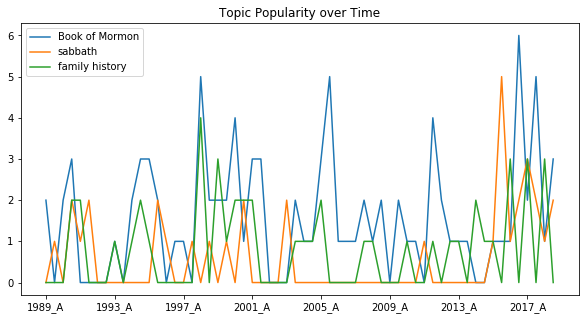

In [238]:
# between 50 and 70
topics = [#'prophets'
         #,'agency'
         'Book of Mormon'
         #,'conversion'
         #,'scriptures'
         #,'charity'
         #,'Resurrection'
         ,'sabbath'
          ,'family history'
         ]
TITLE = 'topic_popularity_04.png'
TITLE = None
plot_past_topics(topics=topics,last_num_years=30,skip=8,save_title=TITLE)

In [ ]:
topics = ['prophets'
         #,'agency'
         ,'Book of Mormon'
         #,'conversion'
         #,'scriptures'
         #,'charity'
         #,'Resurrection'
          ,'sabbath'
         ]

In [191]:
temp = topic_counts[(topic_counts > 70) & (topic_counts < 200)]
print(temp.size)
temp

38


prophets           188
covenants          167
temple             163
morality           162
example            158
agency             154
children           148
joy                143
youth              138
Restoration        125
marriage           124
Book of Mormon     122
teaching           118
women              118
conversion         117
home               115
commandments       114
scripture study    112
parenthood         112
peace              111
scriptures         106
Joseph Smith       104
welfare             99
God the Father      89
truth               87
charity             86
forgiveness         86
sacrifice           85
gratitude           84
education           84
preparation         82
Resurrection        82
activation          82
humility            81
honesty             80
temple work         77
Relief Society      75
discipleship        74
dtype: int64

# Most popular topic for each general conference

In [112]:

# print(dict(agg.idxmax(axis=1)))
#this is pretty obviously the first for most conferences
temp = agg.drop(columns='Jesus Christ')
x = temp.idxmax(axis=1)
dict(x)

{'1971_A': 'plan of salvation',
 '1971_O': 'love',
 '1972_A': 'priesthood',
 '1972_O': 'obedience',
 '1973_A': 'priesthood',
 '1973_O': 'obedience',
 '1974_A': 'spirituality',
 '1974_O': 'commitment',
 '1975_A': 'missionary work',
 '1975_O': 'missionary work',
 '1976_A': 'family',
 '1976_O': 'testimony',
 '1977_A': 'welfare',
 '1977_O': 'welfare',
 '1978_A': 'spirituality',
 '1978_O': 'spirituality',
 '1979_A': 'missionary work',
 '1979_O': 'welfare',
 '1980_A': 'welfare',
 '1980_O': 'Relief Society',
 '1981_A': 'family',
 '1981_O': 'charity',
 '1982_A': 'honesty',
 '1982_O': 'priesthood',
 '1983_A': 'family',
 '1983_O': 'faith',
 '1984_A': 'missionary work',
 '1984_O': 'service',
 '1985_A': 'service',
 '1985_O': 'Church organization',
 '1986_A': 'welfare',
 '1986_O': 'repentance',
 '1987_A': 'missionary work',
 '1987_O': 'missionary work',
 '1988_A': 'Atonement',
 '1988_O': 'commitment',
 '1989_A': 'obedience',
 '1989_O': 'service',
 '1990_A': 'service',
 '1990_O': 'obedience',
 '1991

In [136]:
x.values

array(['plan of salvation', 'love', 'priesthood', 'obedience',
       'priesthood', 'obedience', 'spirituality', 'commitment',
       'missionary work', 'missionary work', 'family', 'testimony',
       'welfare', 'welfare', 'spirituality', 'spirituality',
       'missionary work', 'welfare', 'welfare', 'Relief Society',
       'family', 'charity', 'honesty', 'priesthood', 'family', 'faith',
       'missionary work', 'service', 'service', 'Church organization',
       'welfare', 'repentance', 'missionary work', 'missionary work',
       'Atonement', 'commitment', 'obedience', 'service', 'service',
       'obedience', 'spirituality', 'faith', 'service', 'faith', 'faith',
       'priesthood', 'love', 'faith', 'scripture study', 'Atonement',
       'prophets', 'Holy Ghost', 'pioneers', 'fellowshipping', 'family',
       'love', 'family', 'Holy Ghost', 'spirituality', 'prayer', 'family',
       'faith', 'faith', 'faith', 'obedience', 'service', 'prayer',
       'testimony', 'faith', 'obedie

In [149]:

unique_elements, counts_elements = np.unique(x.values, return_counts=True)
counts_elements = counts_elements.astype(int)
y = np.array([[unique_elements[i],counts_elements[i]] for i in range(len(unique_elements))])
y

array([['Atonement', '3'],
       ['Church organization', '1'],
       ['Holy Ghost', '2'],
       ['Relief Society', '1'],
       ['adversity', '5'],
       ['charity', '1'],
       ['commitment', '2'],
       ['faith', '13'],
       ['family', '9'],
       ['fellowshipping', '1'],
       ['honesty', '1'],
       ['love', '5'],
       ['ministering', '1'],
       ['missionary work', '6'],
       ['obedience', '7'],
       ['pioneers', '1'],
       ['plan of salvation', '1'],
       ['prayer', '2'],
       ['priesthood', '7'],
       ['prophets', '1'],
       ['repentance', '1'],
       ['scripture study', '1'],
       ['service', '9'],
       ['spirituality', '6'],
       ['testimony', '4'],
       ['welfare', '5']], dtype='<U19')

In [150]:
# z = pd.DataFrame(y,columns=['Word','Weight','Color'])
z = pd.DataFrame(y,columns=['Word','Weight'])
# z.to_csv('word_cloud_art.csv')

In [153]:
z['Weight'] = [int(x) for x in z.Weight]
z.sort_values(by='Weight',ascending=False,inplace=True)


In [154]:
z

,Word,Weight
7,faith,13
8,family,9
22,service,9
18,priesthood,7
14,obedience,7
13,missionary work,6
23,spirituality,6
11,love,5
25,welfare,5
4,adversity,5


In [135]:
os.getcwd()

'/Users/joeywilkes/senior-labs/gc_nlp_m404_project'